In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [7]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
print("Categories in gender varaible",end=" ")
print(df['gender'].unique())

Categories in gender varaible ['female' 'male']


In [9]:
print("Categories in race_ethnicity     varaible",end=" ")
print(df['race_ethnicity'].unique())

Categories in race_ethnicity     varaible ['group B' 'group C' 'group A' 'group D' 'group E']


In [10]:
print("Categories in parental_level_of_education varaible",end=" ")
print(df['parental_level_of_education'].unique())

Categories in parental_level_of_education varaible ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [11]:
print("Categories in lunch varaible",end=" ")
print(df['lunch'].unique())

Categories in lunch varaible ['standard' 'free/reduced']


In [12]:
print("Categories in testPreperation Cources varaible",end=" ")
print(df['test_preparation_course'].unique())

Categories in testPreperation Cources varaible ['none' 'completed']


In [13]:
print("Categories in gender varaible",end=" ")
print(df['gender'].unique())

Categories in gender varaible ['female' 'male']


In [14]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
print('We have {} numerical features :{}'.format(len(numeric_features),numeric_features))
print('We have {} categorical features :{}'.format(len(categorical_features),categorical_features))


We have 3 numerical features :['math_score', 'reading_score', 'writing_score']
We have 5 categorical features :['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [15]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/len(numeric_features)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
reading_full=df[df['reading_score']==100].count()[0]
writting_full=df[df['writing_score']==100].count()[0]
math_full=df[df['math_score']==100].count()[0]

In [17]:
print(f"Number of students with full marks in Maths:{math_full}")
print(f"Number of students with full marks in writting:{writting_full}")
print(f"Number of students with full marks in reading:{reading_full}")

Number of students with full marks in Maths:7
Number of students with full marks in writting:14
Number of students with full marks in reading:17


In [18]:
reading_fail=df[df['reading_score']<=20].count()[0]
writting_fail=df[df['writing_score']<=20].count()[0]
math_fail=df[df['math_score']<=20].count()[0]

In [19]:
print(f"Number of students fail in Maths:{math_fail}")
print(f"Number of students fail in writting:{writting_fail}")
print(f"Number of students fail in reading:{reading_fail}")

Number of students fail in Maths:4
Number of students fail in writting:3
Number of students fail in reading:1


# DATA VIUALIZATION

<Axes: xlabel='average', ylabel='Count'>

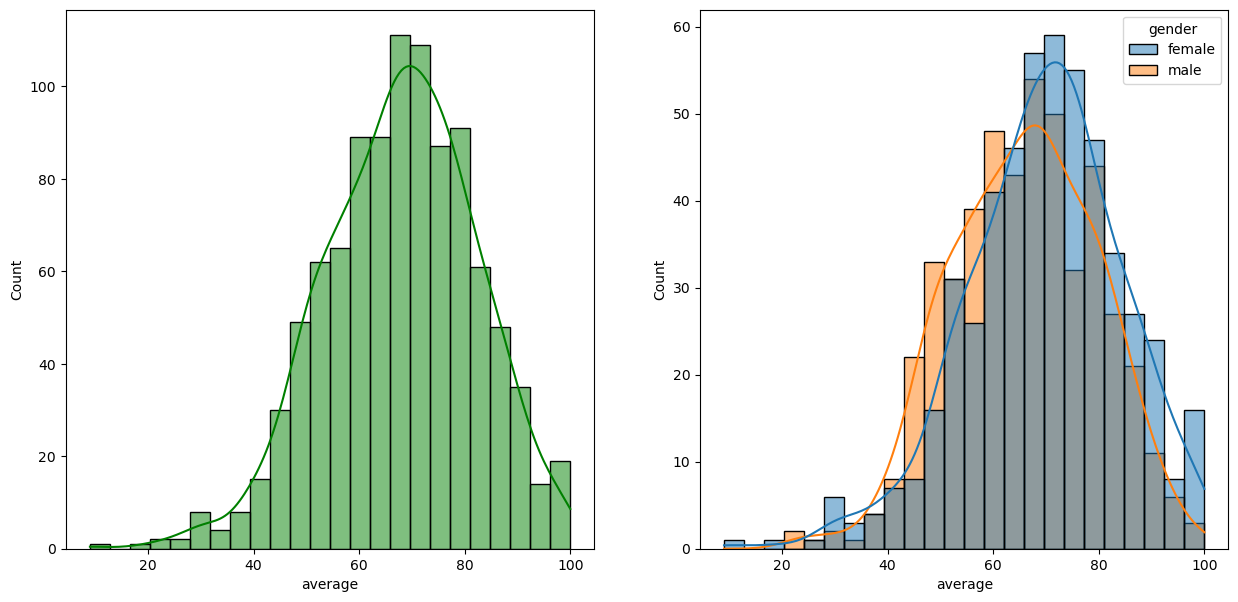

In [20]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')

# Insights:  Female students tend to perform well than male student

<Axes: xlabel='total_score', ylabel='Count'>

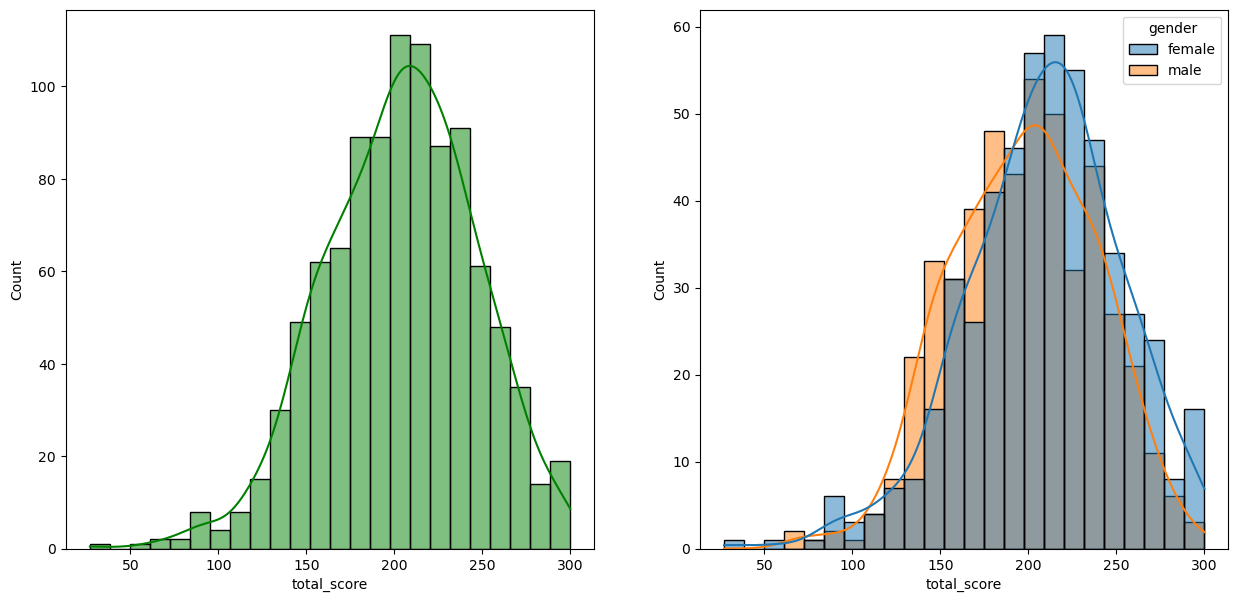

In [21]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')

<Axes: xlabel='average', ylabel='Count'>

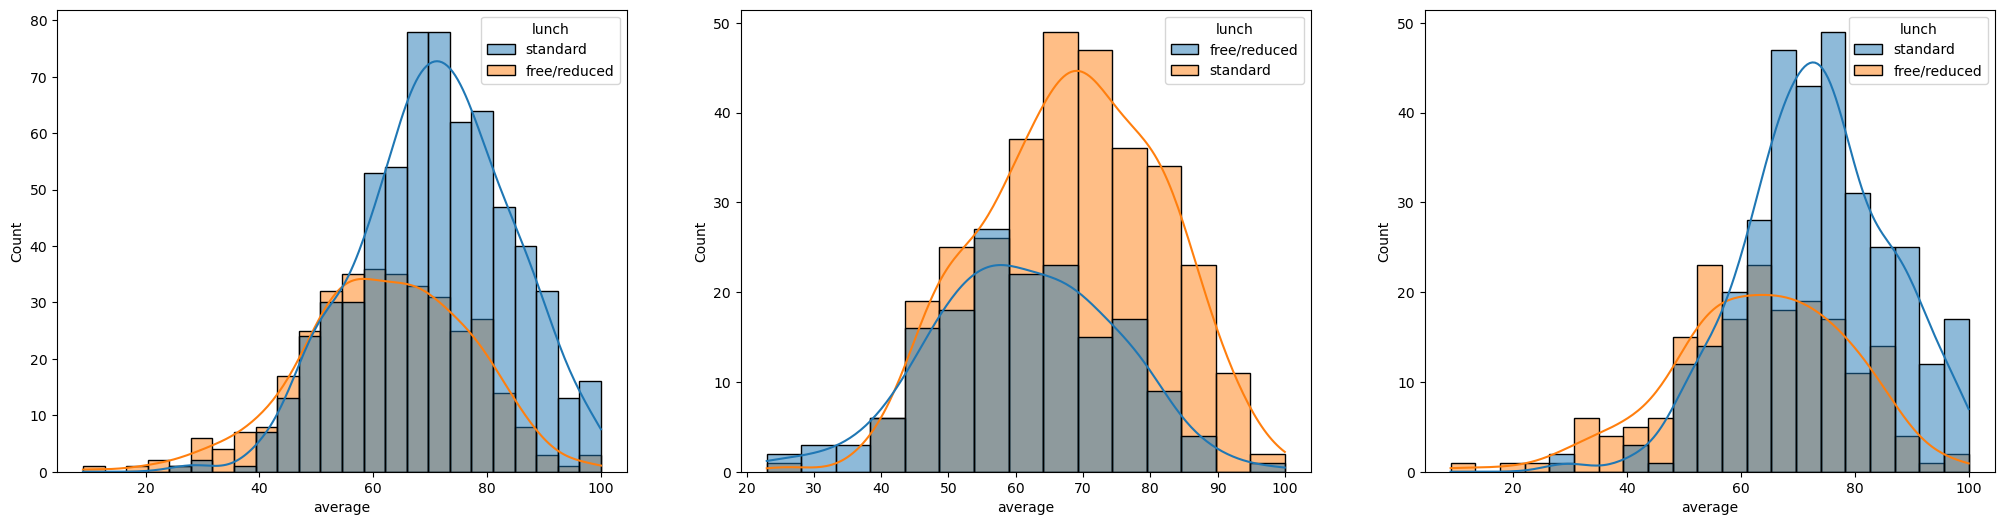

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue='lunch')

# .Standard lunch helps to perform well in exams
# .Standard lunch helps to perform well in exams for both male and female

<Axes: xlabel='average', ylabel='Count'>

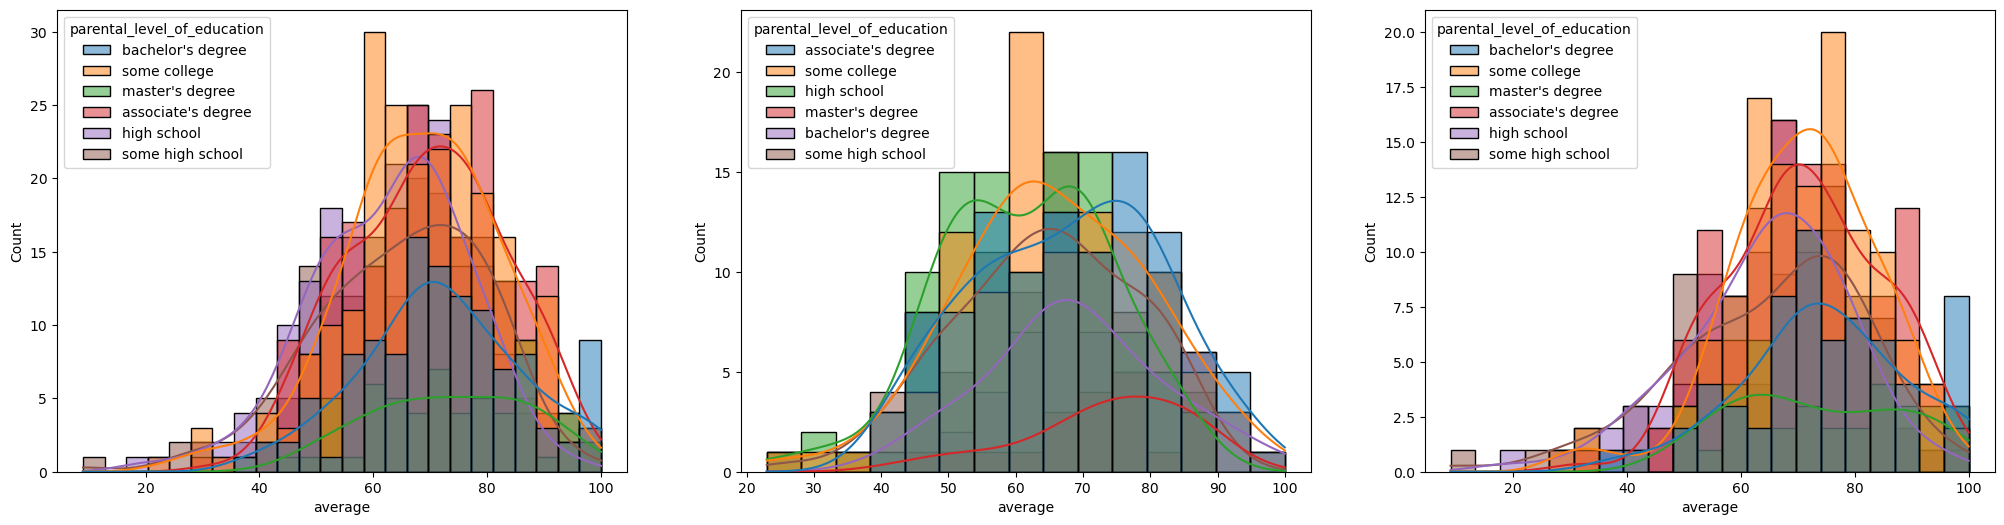

In [23]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue='parental_level_of_education')

# .In general parents edu don't help student perform well in exam

# .but in 2nd plot shows that the parents who has high degree their male students tends to perform well

# .3rd plot we can see that there is np effect of parrents education on female students


<Axes: xlabel='average', ylabel='Count'>

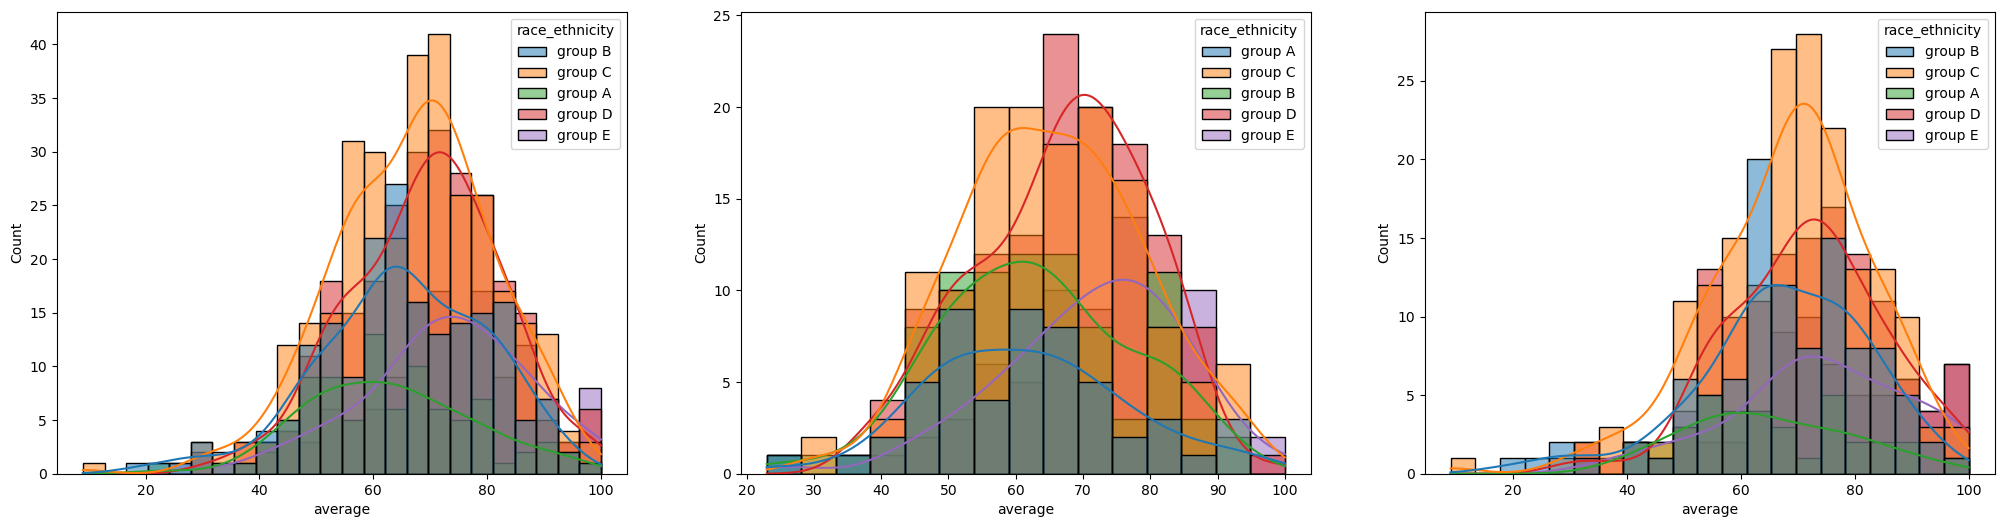

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue='race_ethnicity')

# Students of group A and B tends to perform poor in exams irrespective of their gender
# In total group C students perform well 
# In male students group D students perform well
# In male students group C students perform well

<Axes: title={'center': 'WRITTING SCORE'}, ylabel='writing_score'>

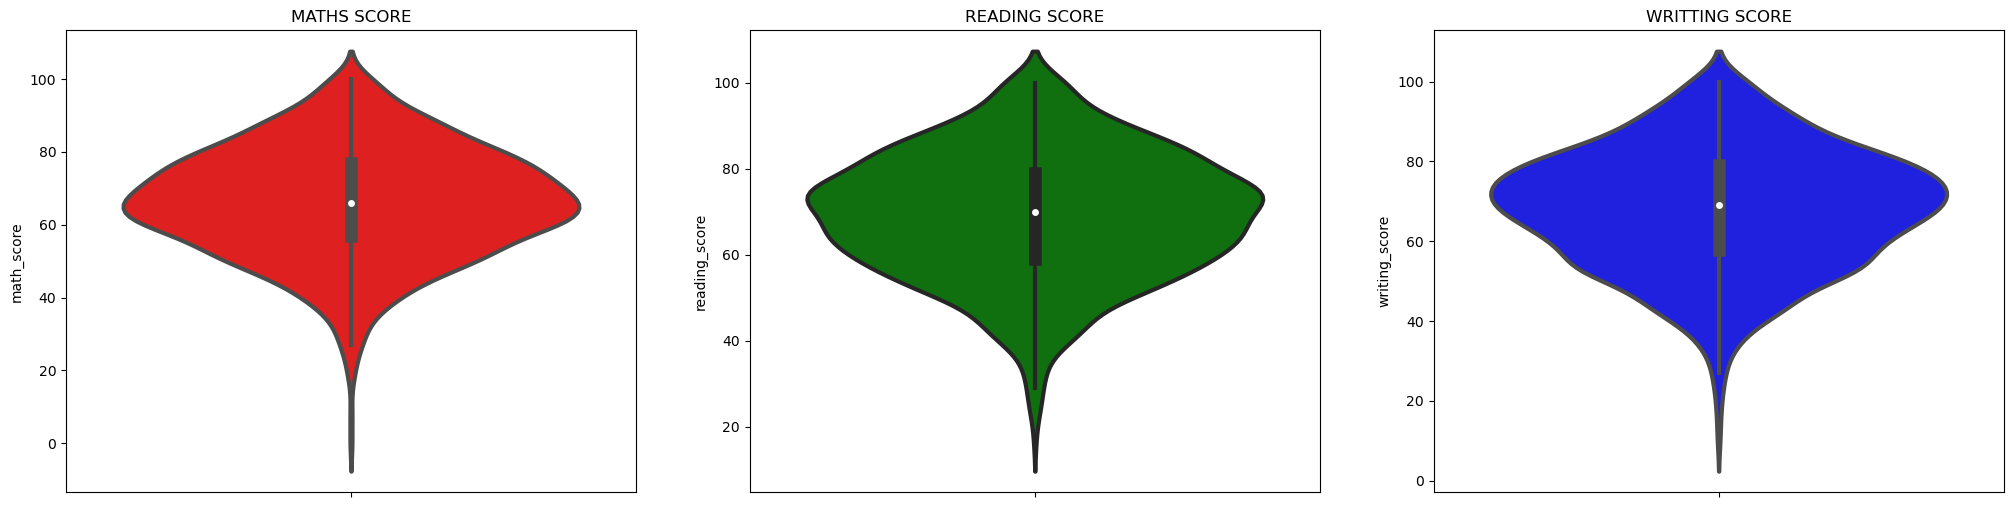

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
plt.title("MATHS SCORE")
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(132)
plt.title("READING SCORE")
sns.violinplot(y='reading_score',data=df,color='g',linewidth=3)
plt.subplot(133)
plt.title('WRITTING SCORE')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)


# From the above three plots it is clear that most of the students 60-70 and in both subjects most of the students 70-80

# Multivariate anaysis using pieplot

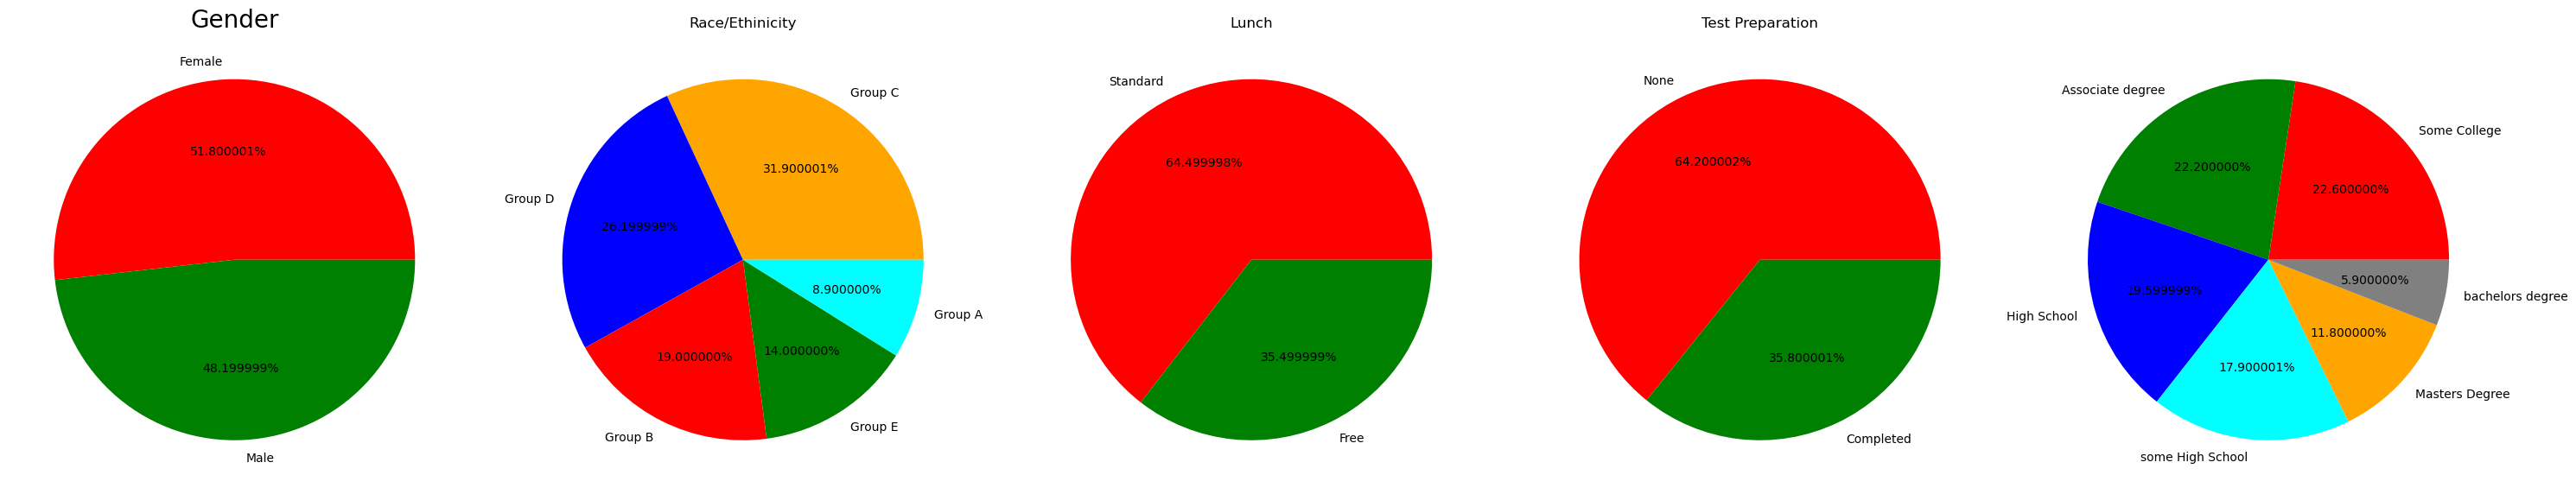

In [50]:
plt.rcParams['figure.figsize']=(30,12)
plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels=['Female','Male']
color=['red','green']
plt.pie(size,labels=labels,colors=color,autopct='%2f%%')
plt.title("Gender",fontsize=20)
plt.axis('on')

plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels=['Group C', 'Group D','Group B','Group E','Group A']
color=['orange','blue','red','green','cyan']

plt.pie(size,labels=labels,colors=color,autopct='%2f%%')
plt.title("Race/Ethinicity")

plt.subplot(1,5,3)
size=df['lunch'].value_counts()
labels=['Standard','Free']
color=['red','green']

plt.pie(size,labels=labels,colors=color,autopct='%2f%%')
plt.title('Lunch')

plt.subplot(1,5,4)
size=df['test_preparation_course'].value_counts()
labels=['None','Completed']
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title("Test Preparation")

plt.subplot(1,5,5)
size=df['parental_level_of_education'].value_counts()
labels=['Some College','Associate degree','High School','some High School',"Masters Degree",'bachelors degree']
color=['red','green','blue','cyan','orange','gray']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.tight_layout()
plt.grid()


# Insights
    # .Number of Male and Female students is almost equal
    # .Number students are greatest in Group C
    # .Number of students who have standard lunch are greater
    # .Number of students who have not enrolled in any test preparation course is greater
    # .Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

# Feature Wise Visualization

# GENDER COLUMN
    How is distribution of Gender ?
    Is gender has any impact on student's performance ?

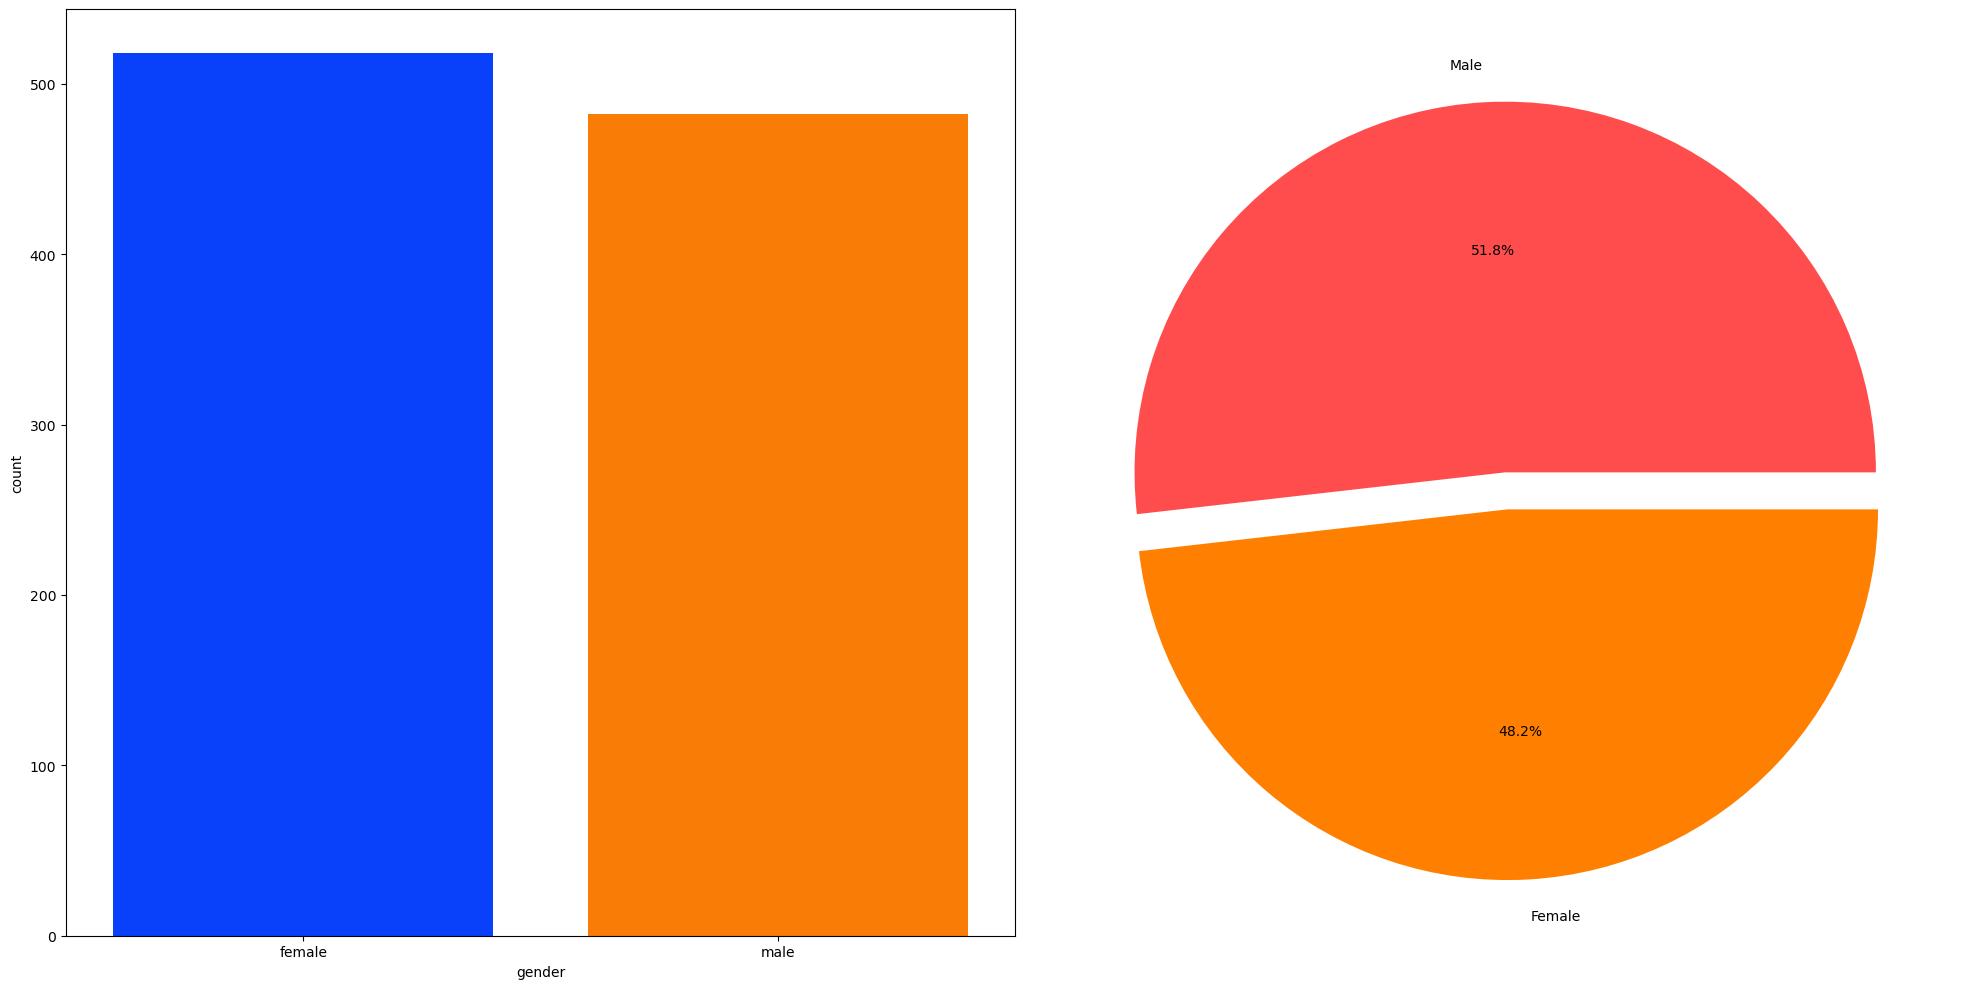

In [64]:
f,ax=plt.subplots(1,2,figsize=(20,10))
plt.subplot(121)
sns.countplot(x=df['gender'],data=df,palette ='bright',saturation=0.95)

plt.subplot(122)
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',colors=['#ff4d4d','#ff8000'])

plt.tight_layout()
plt.grid()

# Insights 
    
    Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

# BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [65]:
gender_group = df.groupby('gender').mean()
gender_group

C:\Users\Nithin\AppData\Local\Temp\ipykernel_14632\3006147241.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_group = df.groupby('gender').mean()


,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


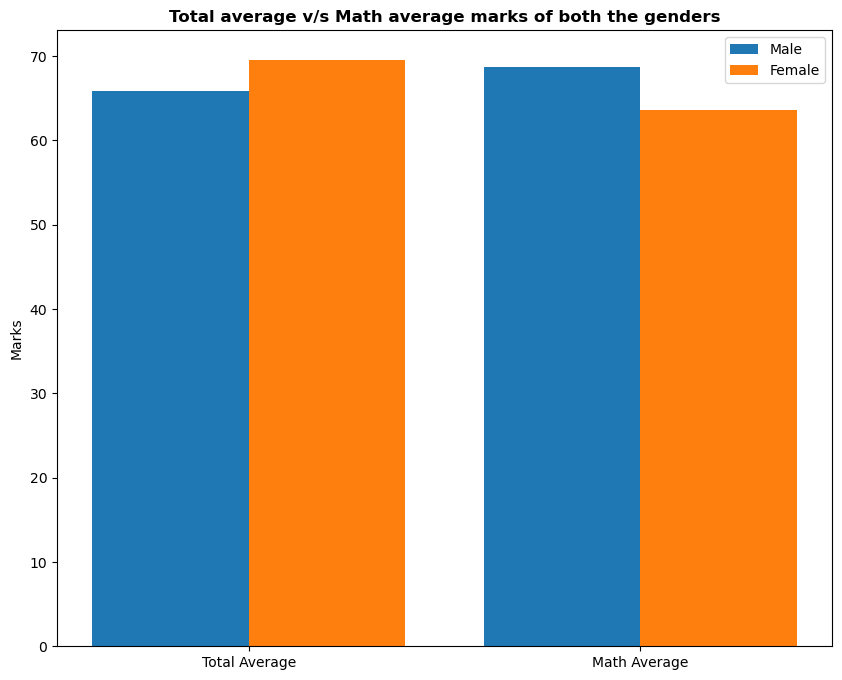

In [77]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

# Insights
    On an average females have a better overall score than men.
    whereas males have scored higher in Maths.

# UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

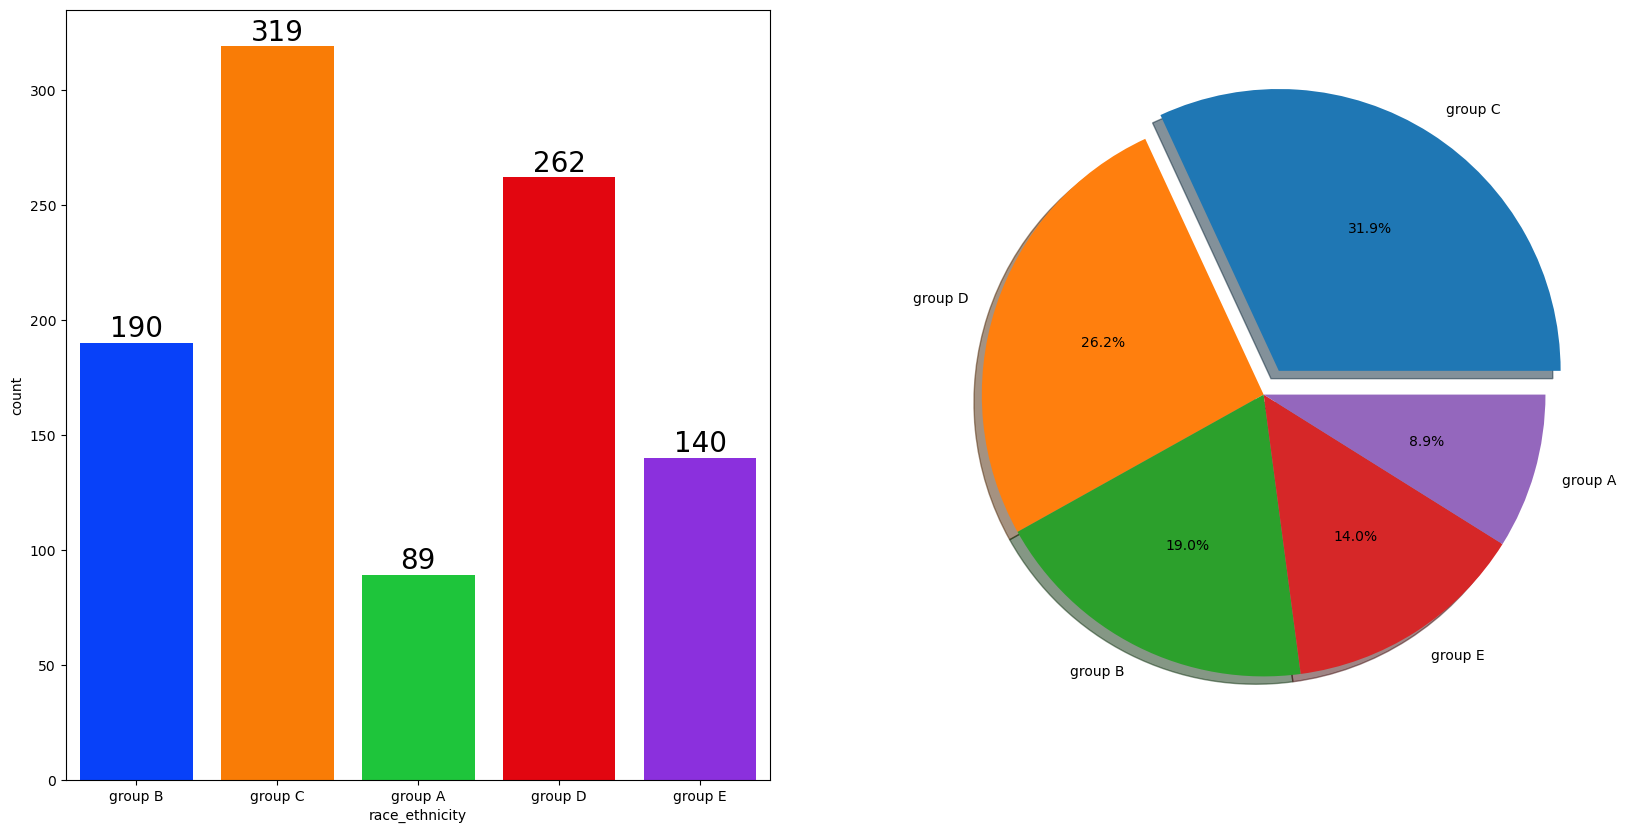

In [79]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

# Insights 

    .Most of the student belonging from group C /group D.
    .Lowest number of students belong to groupA.

In [89]:
Group_data2=df.groupby('race_ethnicity')
Group_data2

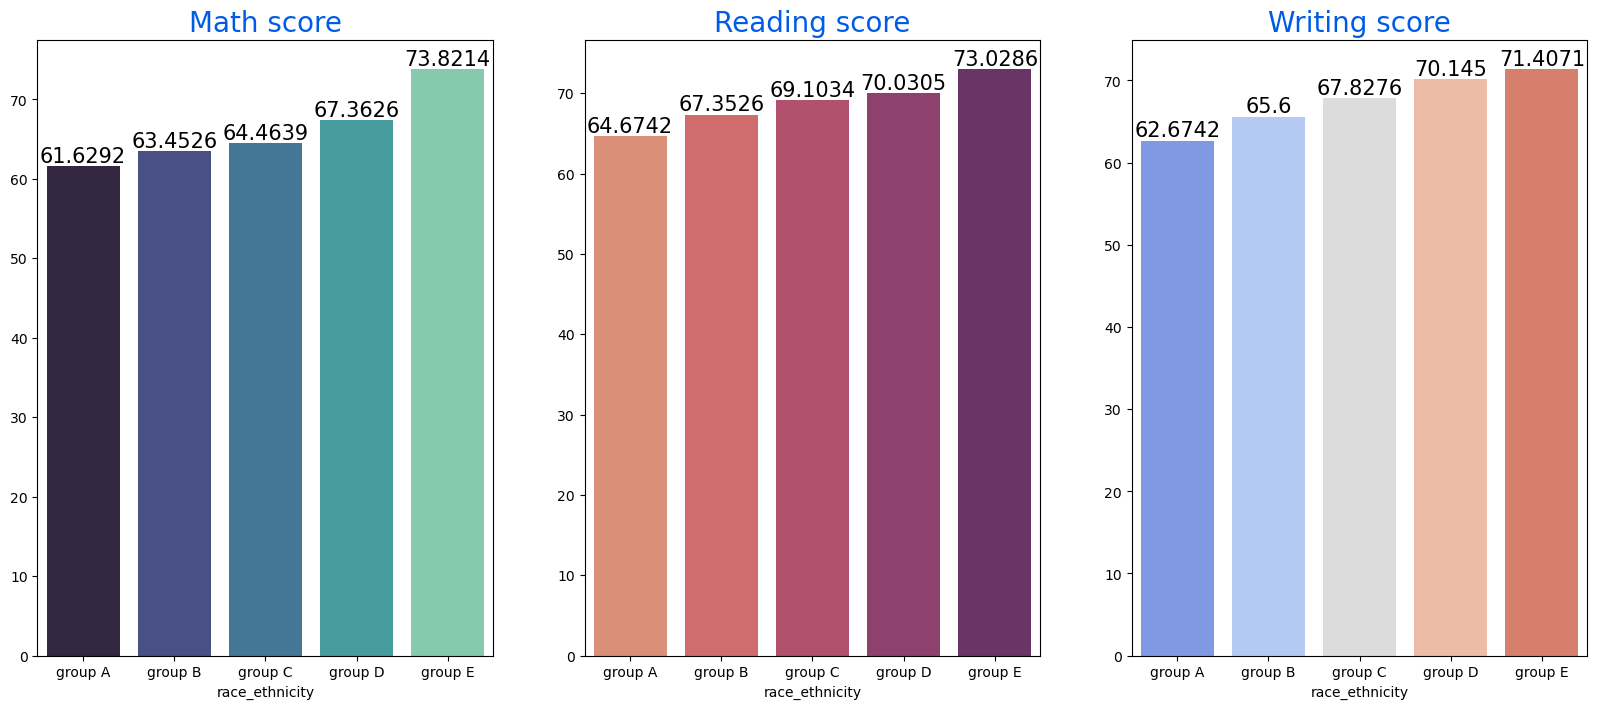

In [90]:

f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

# Insights
    Group E students have scored the highest marks.
    Group A students have scored the lowest marks.
    Students from a lower Socioeconomic status have a lower avg in all course subjects

#  PARENTAL LEVEL OF EDUCATION COLUMN

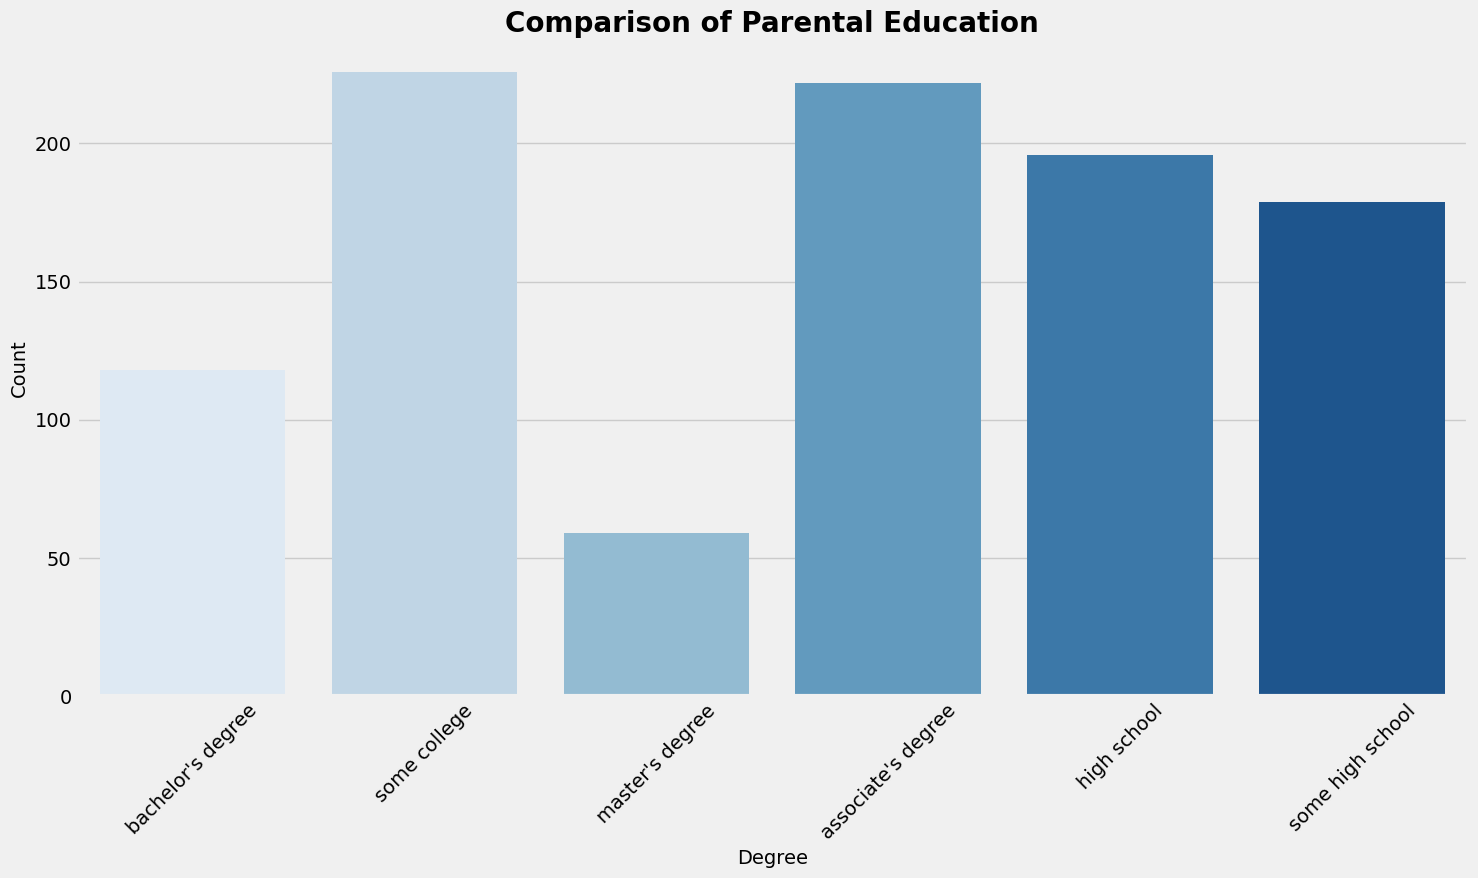

In [94]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')


sns.countplot(data=df, x='parental_level_of_education', palette='Blues')
plt.title('Comparison of Parental Education', fontweight='bold', fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

# Insights
    Largest number of parents are from some college.

# BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

C:\Users\Nithin\AppData\Local\Temp\ipykernel_14632\770419395.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))


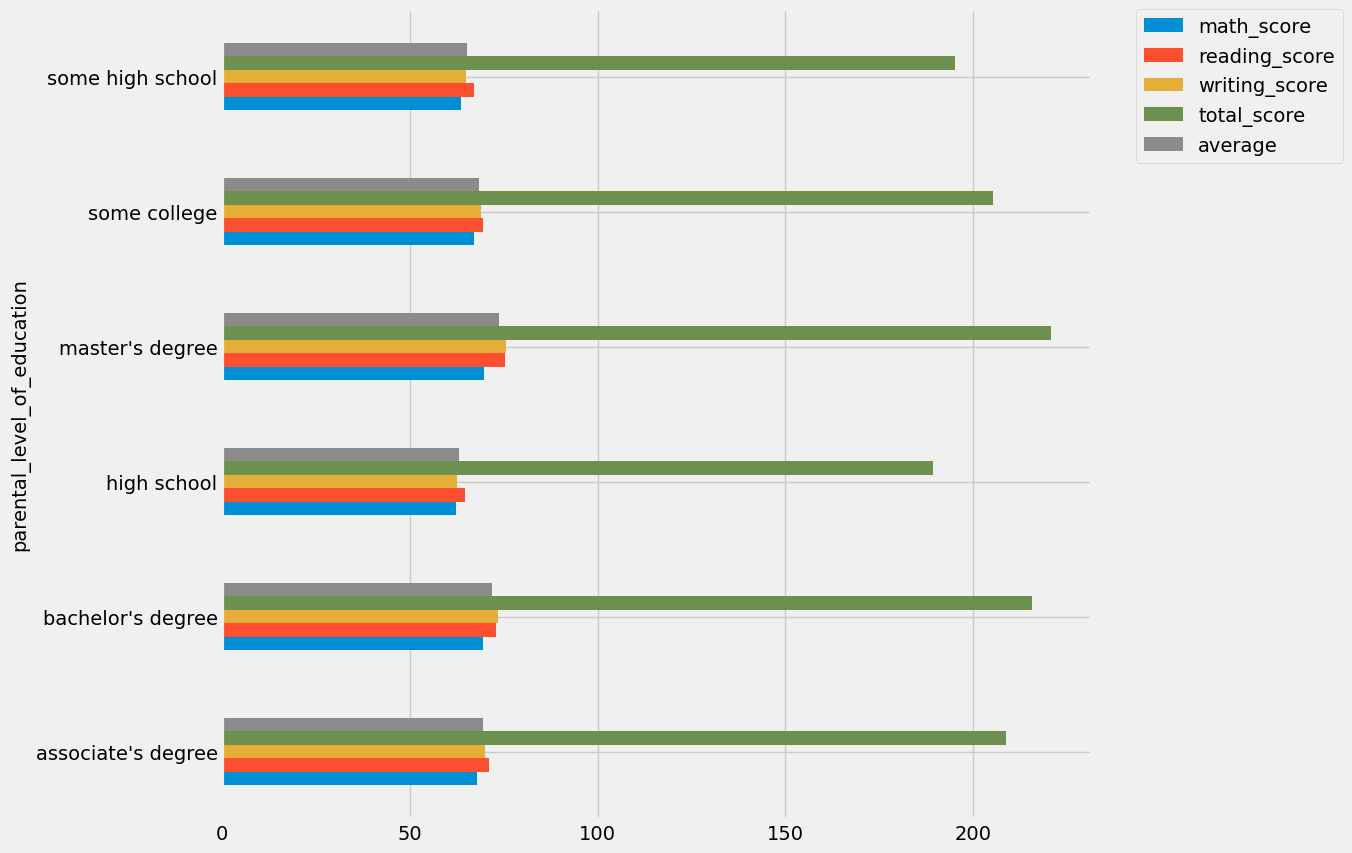

In [98]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


# Insights
    The score of student whose parents possess master and bachelor level education are higher than others.

# LUNCH COLUMN

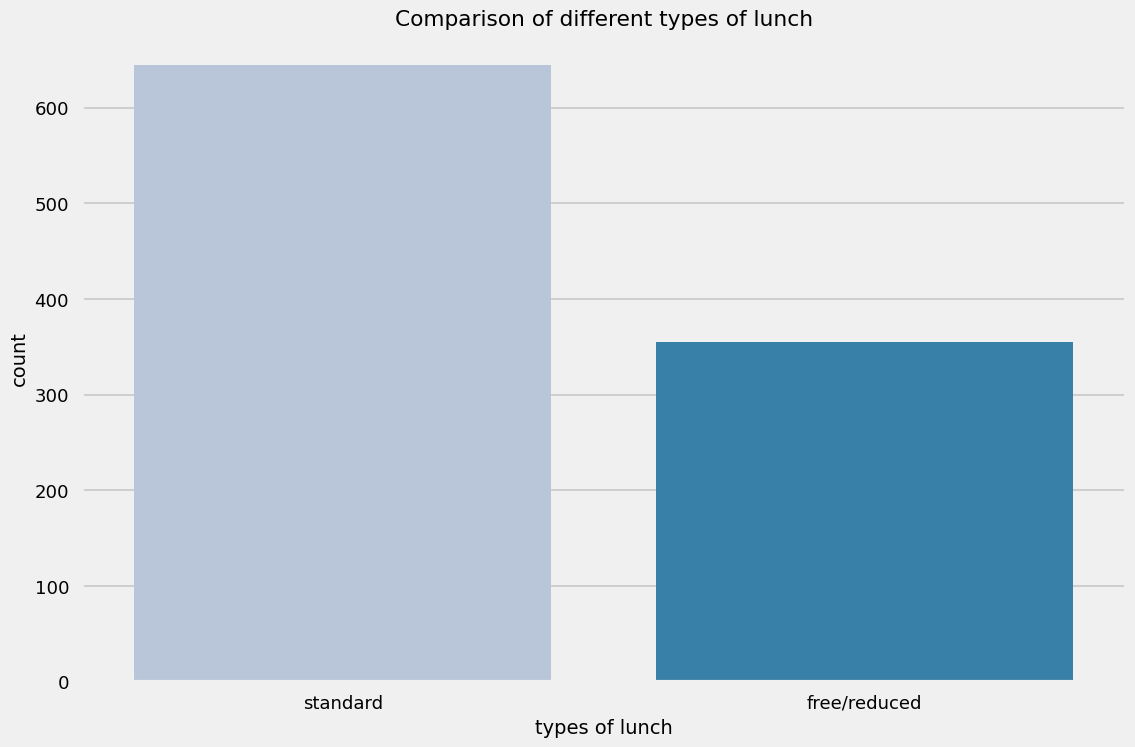

In [106]:
plt.figure(figsize=(12,8))

sns.countplot(data=df,x='lunch', palette ='PuBu')
plt.title('Comparison of different types of lunch')
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

# Insights
    Students being served Standard lunch was more than free lunch

# BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

C:\Users\Nithin\AppData\Local\Temp\ipykernel_14632\1372272843.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)
C:\Users\Nithin\AppData\Local\Temp\ipykernel_14632\1372272843.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,2)


<Axes: xlabel='lunch', ylabel='writing_score'>

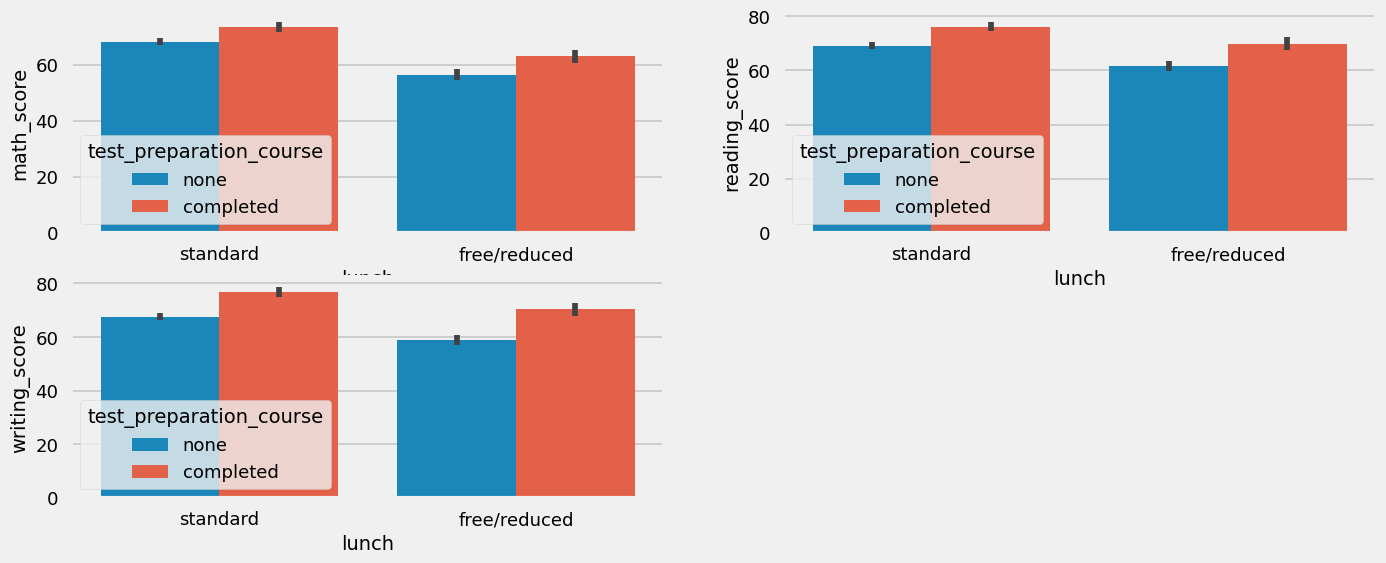

In [123]:

plt.subplots(1,3,figsize=(15,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

# Insights
    Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

# CHECKING OUTLIERS

<Axes: >

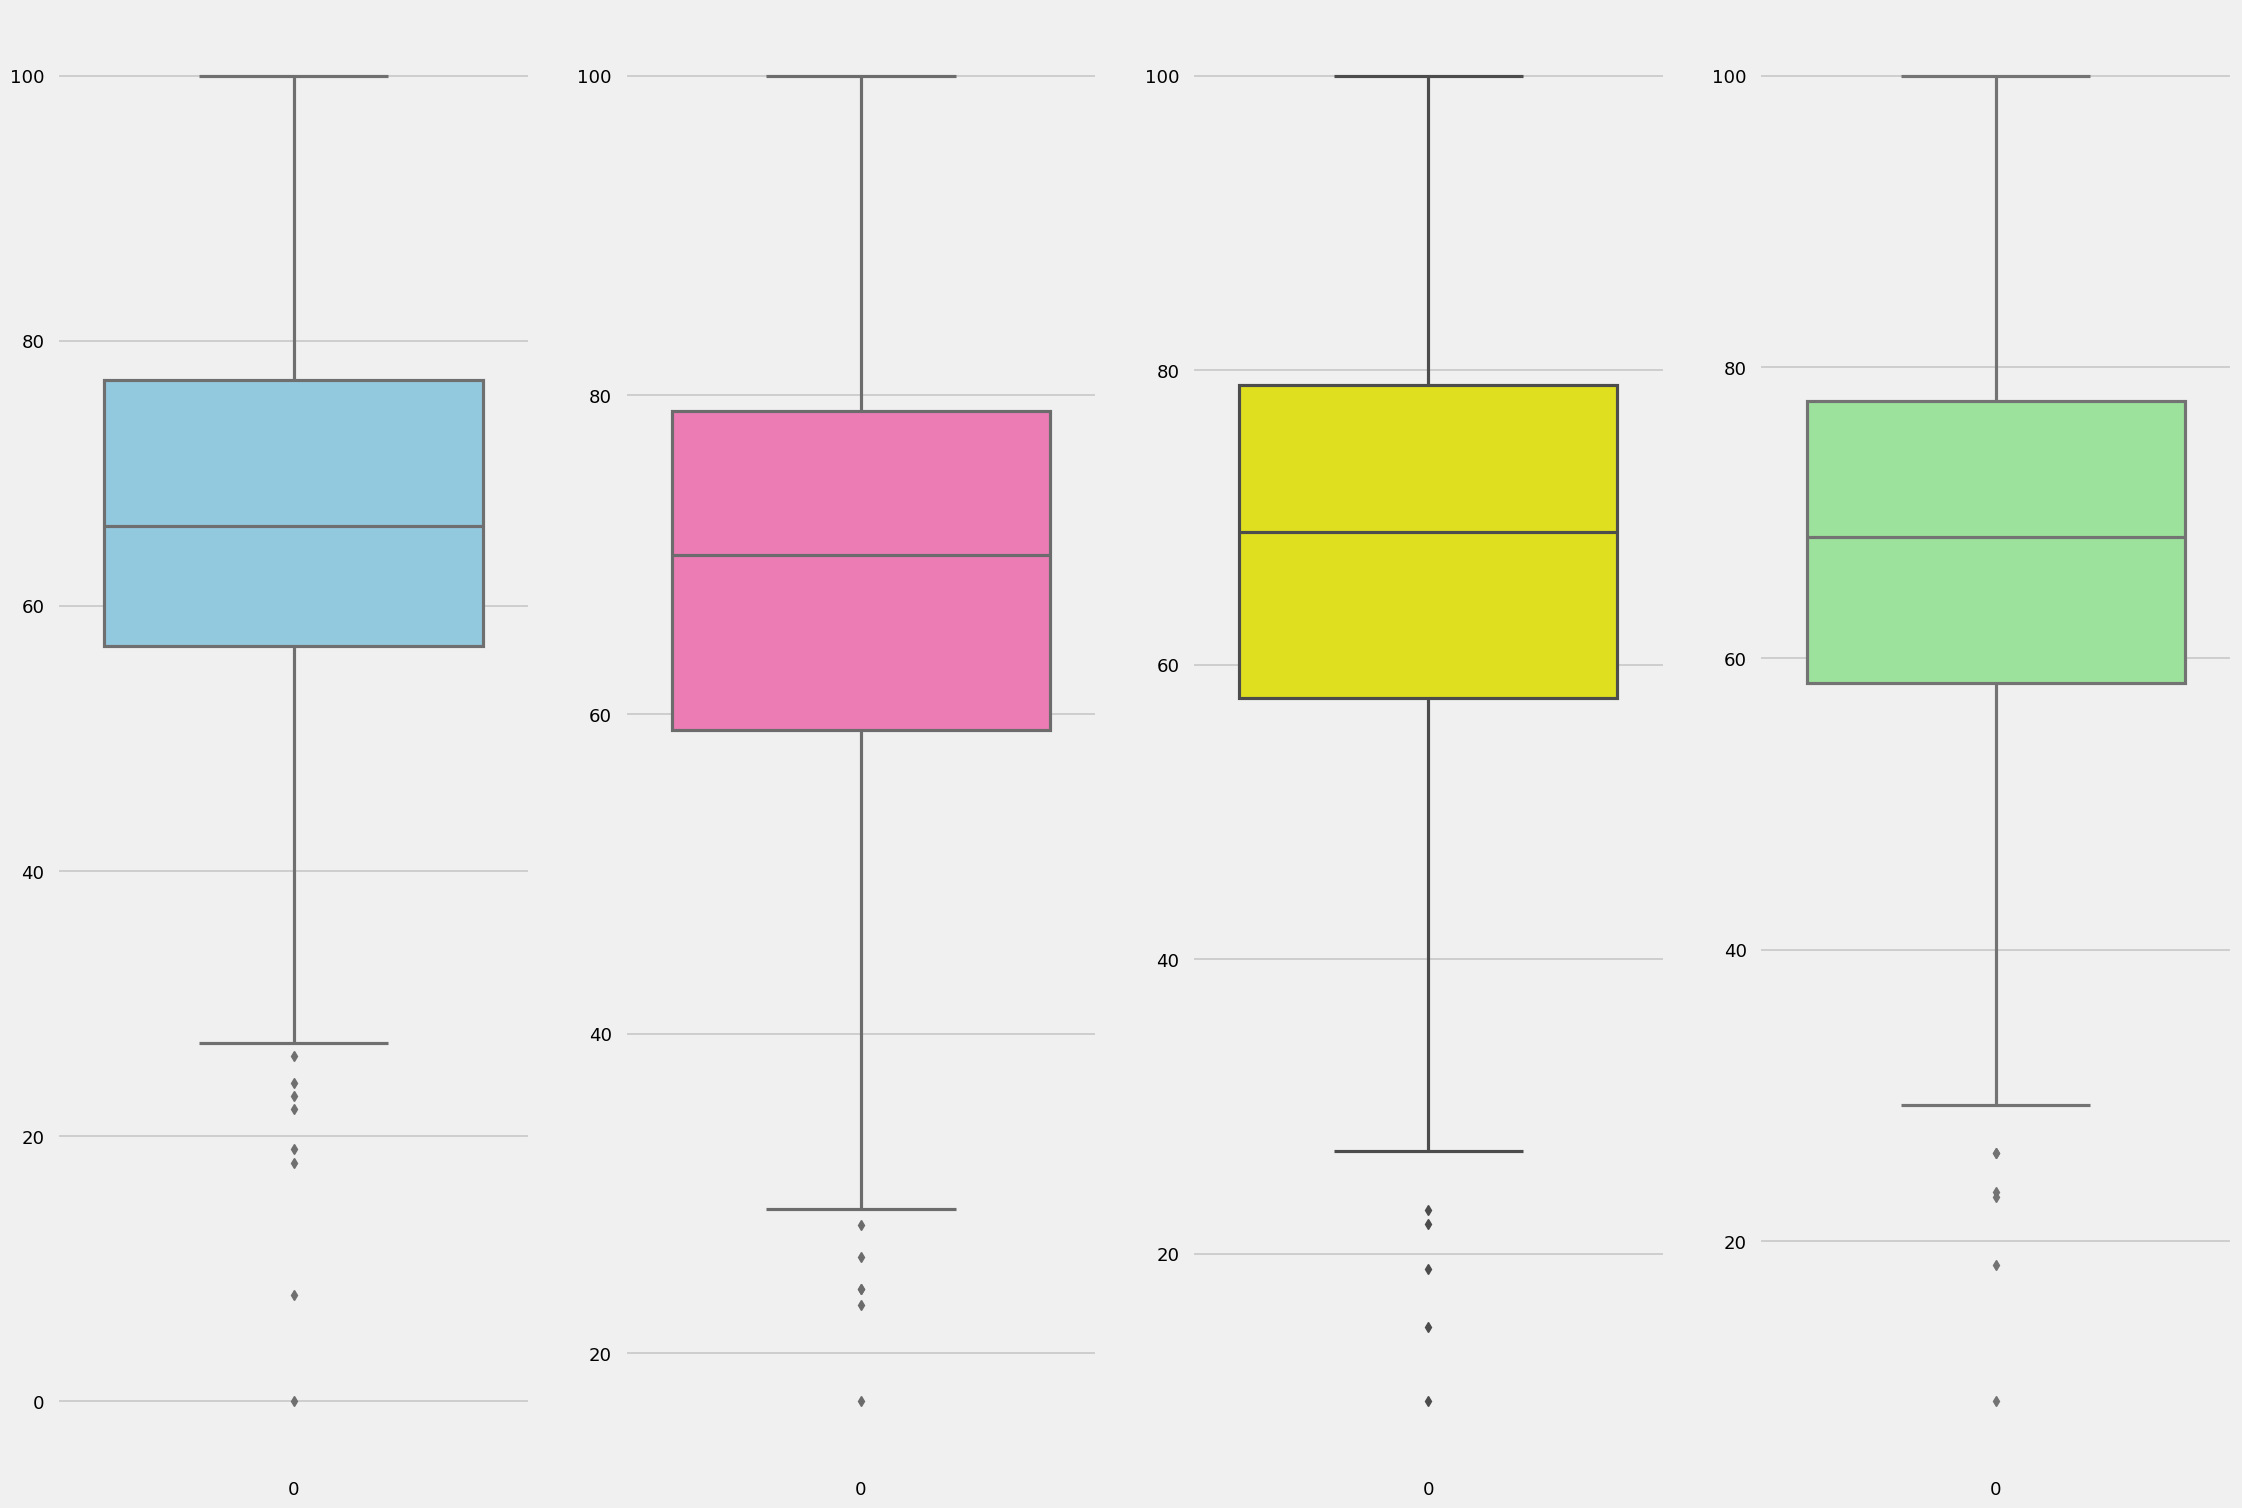

In [127]:
plt.subplots(1,4,figsize=(25,18))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')


# MUTIVARIATE ANALYSIS USING PAIRPLOT

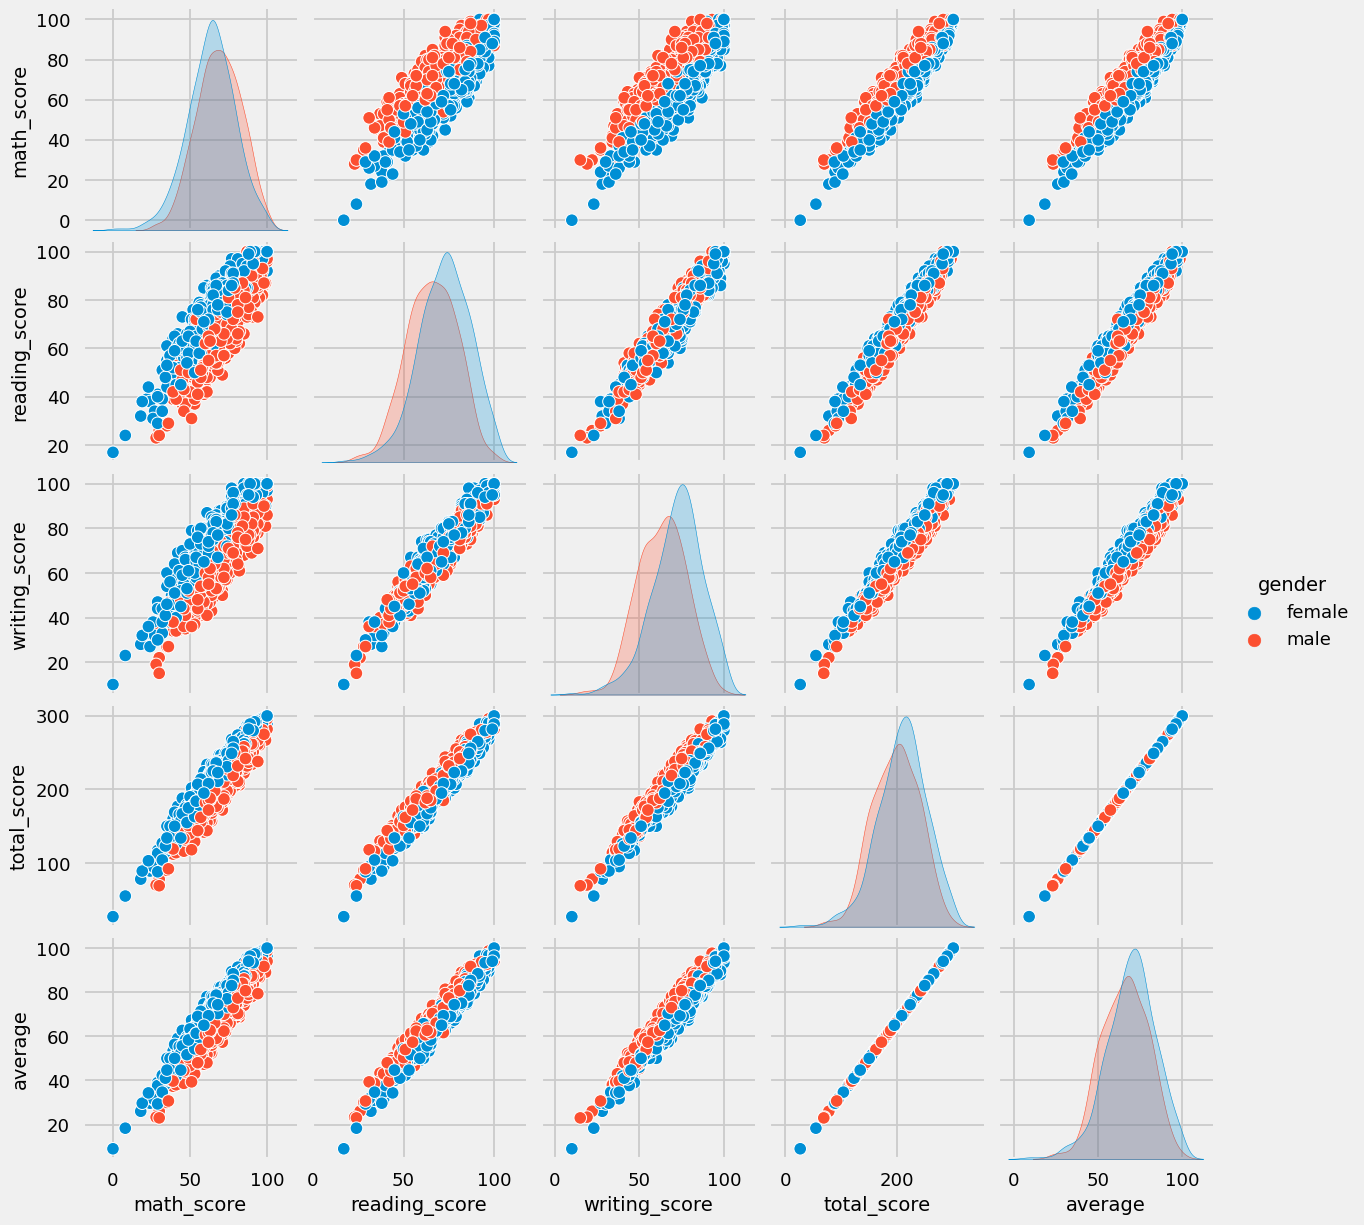

In [130]:
sns.pairplot(df,hue = 'gender')

# Insights
    From the above plot it is clear that all the scores increase linearly with each other.

# Conclusions
    Student's Performance is related with lunch, race, parental level education
    Females lead in pass percentage and also are top-scorers
    Student's Performance is not much related with test preparation course
    Finishing preparation course is benefitial.